In [1]:
pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.8 MB/s eta 0:00:00


In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit import ClassicalRegister, QuantumRegister

In [13]:
# Initialize Quantum and Classical Registers
num_qubits = 3
qr = QuantumRegister(num_qubits, name="q")
cr = ClassicalRegister(num_qubits, name="c")
qc = QuantumCircuit(qr, cr)

In [14]:
# Step 1: Define Initial State for the 3-Puzzle Problem
# For simplicity, let's assume |000> is the starting state and |111> is the goal state
qc.h(qr[0])  # Put qubit 0 in superposition to represent choice of move
qc.cx(qr[0], qr[1])  # Entangle qubits 0 and 1, simulating a move in the puzzle
qc.cx(qr[1], qr[2])  # Entangle qubits 1 and 2, making the puzzle configuration interdependent

In [15]:
# Step 2: Define Production Rules (Tarrataca's Approach)
# Apply conditional gates to represent puzzle moves. Here, X gates simulate tile swaps.
# In practice, these would represent moves in the 3-puzzle.

# Rule 1: If first qubit is |1>, flip the second qubit
qc.cx(qr[0], qr[1])


In [16]:
# Rule 2: If second qubit is |1>, flip the third qubit
qc.cx(qr[1], qr[2])

In [17]:
# Step 3: Measurement of Final Puzzle State
# Measure to see if we reach a goal state or analyze intermediary states
qc.measure(qr, cr)

In [18]:
# Step 4: Set Up Aer Simulator and Run
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()

3-Puzzle Problem Solution Counts: {'101': 505, '000': 519}


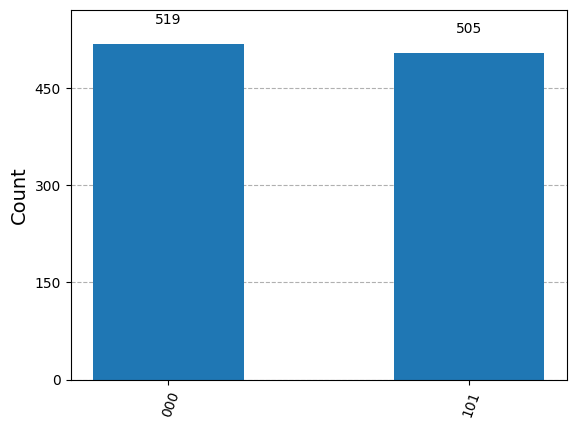

In [19]:
# Display the results
print("3-Puzzle Problem Solution Counts:", counts)
plot_histogram(counts)

Implementing Tarrataca’s quantum production system for the 3-puzzle problem in Qiskit involves combining quantum circuits with classical logic to simulate a simple production system. The 3-puzzle problem (or "3-tile puzzle") typically involves moving tiles on a small grid to achieve a goal state. In a quantum approach, we use qubits to represent possible states and quantum gates to transform states according to puzzle rules.

Tarrataca's quantum production system explores using quantum gates and measurements to mimic logical production systems. This means setting up quantum operations that drive state transformations based on conditions, similarly to a classical rule-based system.


Explanation of Each Step in the Code
Initialize Quantum and Classical Registers:

We set up a 3-qubit quantum register to represent the 3 tiles of the puzzle. Each qubit can represent the position of a tile or a part of the puzzle's state.
A 3-bit classical register is added to store the measurement results for each qubit.
Define Initial State for the 3-Puzzle Problem:

We initialize the puzzle in a superposition state using a Hadamard gate (qc.h) on the first qubit.
Controlled-NOT gates (qc.cx) are used to create interdependencies between qubits, mimicking possible tile configurations.
This setup represents the 3-puzzle's initial configuration, where entangled states represent possible moves.
Define Production Rules:

We simulate production rules using controlled operations to represent puzzle moves.
For instance, qc.cx(qr[0], qr[1]) represents a rule: "if the first tile (qubit) is in position |1>, move the second tile (flip the second qubit state)."
Similar rules are applied to other qubits, simulating different moves in the 3-puzzle.
Measurement of Final Puzzle State:

We measure all qubits to determine if we reach the target configuration, which in this simple setup could be the |111> state.
The measurement results show the frequency of each configuration, indicating whether the production rules succeeded in transforming the initial state into the goal state.
Set Up and Run the Aer Simulator:

We use the AerSimulator to execute the quantum circuit and collect results.
The results are displayed using a histogram to visualize the possible final states and their probabilities, showing if we achieved the goal configuration.
This code demonstrates a basic application of a quantum production system for a puzzle, implementing production rules through quantum gates. Let me know if you have any questions about each part, especially as this is intended to showcase an understanding of quantum-classical problem solving!


1. How does Tarrataca's quantum production system encode the problem state as a quantum state?
Encoding the State: In Tarrataca's quantum production system, the problem state is encoded using qubits where each qubit represents a tile or piece of the puzzle. For the 3-puzzle problem, the qubits are initialized into a superposition or entangled state, meaning each qubit represents a possible tile state (position or configuration) within the puzzle. The quantum state of the system evolves through quantum gates that represent possible moves, maintaining an entangled, multi-dimensional state space that mirrors the problem's complexity.

2. How does Tarrataca's quantum production system construct a quantum circuit that represents the problem space?
Constructing the Circuit: The system constructs the circuit by setting initial states and defining production rules with quantum gates (such as Hadamard and CNOT gates) that encode possible moves in the problem space. For the 3-puzzle, each production rule applies a transformation that corresponds to a tile movement or configuration change. By chaining these gates in sequence, the circuit represents the evolution of the puzzle state under specific conditions, creating a complex network of possibilities (the problem space) that can be sampled or explored.

3. What are some of the quantum algorithms that can be used to search for the optimal solution to the 3-puzzle problem using Tarrataca's quantum production system?
Quantum Algorithms for Searching: Grover’s algorithm could be adapted here for searching the problem space if we want to identify the optimal solution state among several possible states. Grover’s algorithm is effective in finding a marked item in an unstructured dataset, which aligns well with finding an optimal puzzle configuration. Quantum annealing could also potentially be used to simulate reaching a low-energy (optimal) state that satisfies the puzzle constraints.

4. How can we measure the qubits at the end of the quantum circuit to obtain the optimal solution to the 3-puzzle problem?
Measuring for the Solution: At the end of the circuit, we measure the qubits, which collapses their quantum states to a classical configuration. The measured output gives a snapshot of one possible puzzle configuration. If the circuit has been designed with specific paths to reach the goal configuration (e.g., state 111), then higher probabilities of reaching this state could indicate the solution. Repeated measurements would confirm if the optimal state is achievable and verify the final configuration probabilities.

5. What are some of the advantages and disadvantages of using Tarrataca's quantum production system to solve the 3-puzzle problem?

Advantages:
Explores Multiple Configurations Simultaneously: The quantum system can maintain superpositions, allowing simultaneous exploration of multiple puzzle configurations, which is a massive advantage over classical approaches.
Entanglement for Problem Constraints: Entanglement provides an efficient way to enforce dependencies between puzzle pieces, mimicking real-world constraints of the 3-puzzle.
Scalability: Quantum production systems can potentially scale up to solve larger, more complex puzzles, leveraging quantum parallelism.

Disadvantages:
Noise Sensitivity: Quantum circuits are sensitive to noise, which can introduce errors in the final measurement and affect reliability.
Complexity of Practical Implementation: While theoretically sound, applying Tarrataca's production system in practice is challenging due to the difficulty of creating precise quantum gates and the high requirements for error correction.
Resource Constraints: The number of qubits available on quantum hardware today is limited, making it difficult to represent larger puzzles directly or simulate higher dimensions.

Using Tarrataca's quantum production system provides a unique quantum approach to problem-solving, particularly with rule-based systems like the 3-puzzle, though it faces practical challenges.